For this project you'll dig into a large amount of text and apply most of what you've covered in this unit and in the course so far.

First, pick a set of texts. This can be either a series of novels, chapters, or articles. Anything you'd like. It just has to have multiple entries of varying characteristics. At least 100 should be good. There should also be at least 10 different authors, but try to keep the texts related (either all on the same topic of from the same branch of literature - something to make classification a bit more difficult than obviously different subjects).

This capstone can be an extension of your NLP challenge if you wish to use the same corpus. If you found problems with that data set that limited your analysis, however, it may be worth using what you learned to choose a new corpus. Reserve 25% of your corpus as a test set.

The first technique is to create a series of clusters. Try several techniques and pick the one you think best represents your data. Make sure there is a narrative and reasoning around why you have chosen the given clusters. Are authors consistently grouped into the same cluster?

Next, perform some unsupervised feature generation and selection using the techniques covered in this unit and elsewhere in the course. Using those features then build models to attempt to classify your texts by author. Try different permutations of unsupervised and supervised techniques to see which combinations have the best performance.

Lastly return to your holdout group. Does your clustering on those members perform as you'd expect? Have your clusters remained stable or changed dramatically? What about your model? Is it's performance consistent?

If there is a divergence in the relative stability of your model and your clusters, delve into why.

Your end result should be a write up of how clustering and modeling compare for classifying your texts. What are the advantages of each? Why would you want to use one over the other? Approximately 3-5 pages is a good length for your write up, and remember to include visuals to help tell your story!

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import gutenberg, stopwords
from collections import Counter

In [2]:
print(gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


### There are twelve different authors in the gutenberg corpus. These will be used for the project

In [3]:
# Load the text files
emma = gutenberg.raw('austen-emma.txt')
persuasion = gutenberg.raw('austen-persuasion.txt')
sense = gutenberg.raw('austen-sense.txt')
bible = gutenberg.raw('bible-kjv.txt')
poems = gutenberg.raw('blake-poems.txt')
#stories = gutenberg.raw('bryant-stories.txt')
#busterbrown = gutenberg.raw('burgess-busterbrown.txt')
#alice = gutenberg.raw('carroll-alice.txt')
#ball = gutenberg.raw('chesterton-ball.txt')
#brown = gutenberg.raw('chesterton-brown.txt')
#thursday = gutenberg.raw('chesterton-thursday.txt')
#parents = gutenberg.raw('edgeworth-parents.txt')
#moby_dick = gutenberg.raw('melville-moby_dick.txt')
#paradise = gutenberg.raw('milton-paradise.txt')
#caesar = gutenberg.raw('shakespeare-caesar.txt')
#hamlet = gutenberg.raw('shakespeare-hamlet.txt')
#macbeth = gutenberg.raw('shakespeare-macbeth.txt')
#leaves = gutenberg.raw('whitman-leaves.txt')

In [5]:
# Utility function for standard text cleaning.
def text_cleaner(text):
    # Visual inspection identifies a form of punctuation spaCy does not
    # recognize: the double dash '--'.  Better get rid of it now!
    text = re.sub(r'--',' ',text)
    text = re.sub("[\[].*?[\]]", "", text)
    text = ' '.join(text.split())
    return text


# The Chapter indicator is idiosyncratic
emma = re.sub(r'Chapter \d+', '', emma)
persuasion = re.sub(r'Chapter \d+', '', persuasion)
sense = re.sub(r'Chapter \d+', '', sense)
bible = re.sub(r'Chapter \d+', '', bible)
poems = re.sub(r'Chapter \d+', '', poems)
#stories = re.sub(r'Chapter \d+', '', stories)
#busterbrown = re.sub(r'Chapter \d+', '', busterbrown)
#alice = re.sub(r'Chapter \d+', '', alice)
#ball = re.sub(r'Chapter \d+', '', ball)
#brown = re.sub(r'Chapter \d+', '', brown)
#thursday = re.sub(r'Chapter \d+', '', thursday)
#parents = re.sub(r'Chapter \d+', '', parents)
#moby_dick = re.sub(r'Chapter \d+', '', moby_dick)
#paradise = re.sub(r'Chapter \d+', '', paradise)
#caesar = re.sub(r'Chapter \d+', '', caesar)
#hamlet = re.sub(r'Chapter \d+', '', hamlet)
#macbeth = re.sub(r'Chapter \d+', '', macbeth)
#leaves = re.sub(r'Chapter \d+', '', leaves)

emma = text_cleaner(emma)
persuasion = text_cleaner(persuasion)
sense = text_cleaner(sense)
bible = text_cleaner(bible)
poems = text_cleaner(poems)
#stories = text_cleaner(stories)
#busterbrown = text_cleaner(busterbrown)
#alice = text_cleaner(alice)
#ball = text_cleaner(ball)
#brown = text_cleaner(brown)
#thursday = text_cleaner(thursday)
#parents = text_cleaner(parents)
#moby_dick = text_cleaner(moby_dick)
#paradise = text_cleaner(paradise)
#caesar = text_cleaner(caesar)
#hamlet = text_cleaner(hamlet)
#macbeth = text_cleaner(macbeth)
#leaves = text_cleaner(leaves)

In [5]:
# Checking to make sure the texts look correct:
#print(emma)
#print(persuasion)
#print(sense)
#print(bible[:1000])
#print(poems)
#print(stories)
#print(busterbrown)
#print(alice)
#print(ball)
#print(brown)
#print(thursday)
#print(parents)
#print(moby_dick)
#print(paradise)
#print(caesar)
#print(hamlet)
#print(macbeth)
#print(leaves)
# The cleaner was successful for each of the texts.

In [6]:
# Parse the cleaned novels. This can take a bit.
nlp = spacy.load('en')
emma_doc = nlp(emma)
persuasion_doc = nlp(persuasion)
sense_doc = nlp(sense)
bible_doc = nlp(bible)
poems_doc = nlp(poems)
#stories_doc = nlp(stories)
#busterbrown_doc = nlp(busterbrown)
#alice_doc = nlp(alice)
#ball_doc = nlp(ball)
#brown_doc = nlp(brown)
#thursday_doc = nlp(thursday)
#parents_doc = nlp(parents)
#moby_dick_doc = nlp(moby_dick)
#paradise_doc = nlp(paradise)
#caesar_doc = nlp(caesar)
#hamlet_doc = nlp(hamlet)
#macbeth_doc = nlp(macbeth)
#leaves_doc = nlp(leaves)

In [8]:
# Group into sentences.
emma_sents = [[sent, "Austen"] for sent in emma_doc.sents]
persuasion_sents = [[sent, "Austen"] for sent in persuasion_doc.sents]
sense_sents = [[sent, "Austen"] for sent in sense_doc.sents]
bible_sents = [[sent, "KJV"] for sent in bible_doc.sents]
poems_sents = [[sent, "Blake"] for sent in poems_doc.sents]
#stories_sents = [[sent, "Bryant"] for sent in stories_doc.sents]
#busterbrown_sents = [[sent, "Burgess"] for sent in busterbrown_doc.sents]
#alice_sents = [[sent, "Carroll"] for sent in alice_doc.sents]
#ball_sents = [[sent, "Chesterton"] for sent in ball_doc.sents]
#brown_sents = [[sent, "Chesterton"] for sent in brown_doc.sents]
#thursday_sents = [[sent, "Chesterton"] for sent in thursday_doc.sents]
#parents_sents = [[sent, "Edgeworth"] for sent in parents_doc.sents]
#moby_dick_sents = [[sent, "Melville"] for sent in moby_dick_doc.sents]
#paradise_sents = [[sent, "Milton"] for sent in paradise_doc.sents]
#caesar_sents = [[sent, "Shakespeare"] for sent in caesar_doc.sents]
#hamlet_sents = [[sent, "Shakespeare"] for sent in caesar_doc.sents]
#macbeth_sents = [[sent, "Shakespeare"] for sent in macbeth_doc.sents]
#leaves_sents = [[sent, "Whitman"] for sent in leaves_doc.sents]

# Combine the sentences into one data frame.
sentences = pd.DataFrame(emma_sents + persuasion_sents + sense_sents + bible_sents
                         + poems_sents) #+ stories_sents + busterbrown_sents)
                         #+ alice_sents + ball_sents + brown_sents + thursday_sents
                         #+ parents_sents + moby_dick_sents + paradise_sents + 
                         #caesar_sents + hamlet_sents + macbeth_sents + leaves_sents)
sentences.head()

,0,1
0,"(VOLUME, I, CHAPTER, I, Emma, Woodhouse, ,, ha...",Austen
1,"(She, was, the, youngest, of, the, two, daught...",Austen
2,"(Her, mother, had, died, too, long, ago, for, ...",Austen
3,"(Sixteen, years, had, Miss, Taylor, been, in, ...",Austen
4,"(Between, _, them, _, it, was, more, the, inti...",Austen


### The first technique is to create a series of clusters. Try several techniques and pick the one you think best represents your data. Make sure there is a narrative and reasoning around why you have chosen the given clusters. Are authors consistently grouped into the same cluster?

In [8]:
### Using the full dataframe causes a memory error. 
### The below code will take a 30% sample of the dataframe.
#sample = sentences.sample(frac = .30, random_state = 25)
#sample.head()

In [9]:
################################################################################
########## NEED TO DO BOW BEFORE CLUSTERING ####################################
################################################################################

# Utility function to create a list of the 2000 most common words.
def bag_of_words(text):
    
    # Filter out punctuation and stop words.
    allwords = [token.lemma_
                for token in text
                if not token.is_punct
                and not token.is_stop]
    
    # Return the most common words.
    return [item[0] for item in Counter(allwords).most_common(2000)]
    

# Creates a data frame with features for each word in our common word set.
# Each value is the count of the times the word appears in each sentence.
def bow_features(sentences, common_words):
    
    # Scaffold the data frame and initialize counts to zero.
    df = pd.DataFrame(columns=common_words)
    df['text_sentence'] = sentences[0]
    df['text_source'] = sentences[1]
    df.loc[:, common_words] = 0
    
    # Process each row, counting the occurrence of words in each sentence.
    for i, sentence in enumerate(df['text_sentence']):
        
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        words = [token.lemma_
                 for token in sentence
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in common_words
                 )]
        
        # Populate the row with word counts.
        for word in words:
            df.loc[i, word] += 1
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 500 == 0:
            print("Processing row {}".format(i))
            
    return df

# Set up the bags.
emmawords = bag_of_words(emma_doc)
persuasionwords = bag_of_words(persuasion_doc)
sensewords = bag_of_words(sense_doc)
biblewords = bag_of_words(bible_doc)
poemswords = bag_of_words(poems_doc)
#storieswords = bag_of_words(stories_doc)
#busterbrownwords = bag_of_words(busterbrown_doc)
#alicewords = bag_of_words(alice_doc)
#ballwords = bag_of_words(ball_doc)
#brownwords = bag_of_words(brown_doc)
#thursdaywords = bag_of_words(thursday_doc)
#parentswords = bag_of_words(parents_doc)
#moby_dickwords = bag_of_words(moby_dick_doc)
#paradisewords = bag_of_words(paradise_doc)
#caesarwords = bag_of_words(caesar_doc)
#hamletwords = bag_of_words(hamlet_doc)
#macbethwords = bag_of_words(macbeth_doc)
#leaveswords = bag_of_words(leaves_doc)

# Combine bags to create a set of unique words.
common_words = set(emmawords + persuasionwords + sensewords + biblewords + poemswords) # + storieswords
                   #+ busterbrownwords) # + alicewords
                   #+ ballwords + brownwords + thursdaywords + parentswords + moby_dickwords
                   #+ paradisewords + caesarwords + hamletwords + macbethwords + leaveswords)

In [10]:
word_counts = bow_features(sentences, common_words)
word_counts.head()

Processing row 0
Processing row 500
Processing row 1000
Processing row 1500
Processing row 2000
Processing row 2500
Processing row 3000
Processing row 3500
Processing row 4000
Processing row 4500
Processing row 5000
Processing row 5500
Processing row 6000
Processing row 6500
Processing row 7000
Processing row 7500
Processing row 8000
Processing row 8500
Processing row 9000
Processing row 9500
Processing row 10000
Processing row 10500
Processing row 11000
Processing row 11500
Processing row 12000
Processing row 12500
Processing row 13000
Processing row 13500
Processing row 14000
Processing row 14500
Processing row 15000
Processing row 15500
Processing row 16000
Processing row 16500
Processing row 17000
Processing row 17500
Processing row 18000
Processing row 18500
Processing row 19000
Processing row 19500
Processing row 20000
Processing row 20500
Processing row 21000
Processing row 21500
Processing row 22000
Processing row 22500
Processing row 23000
Processing row 23500
Processing row 2

,encamp,syria,ashamed,reformation,person,continually,ignorance,affront,cordiality,smild,...,circumcise,elegance,belly,unknown,effect,henrietta,dwell,9:12,text_sentence,text_source
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(VOLUME, I, CHAPTER, I, Emma, Woodhouse, ,, ha...",Austen
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(She, was, the, youngest, of, the, two, daught...",Austen
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(Her, mother, had, died, too, long, ago, for, ...",Austen
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(Sixteen, years, had, Miss, Taylor, been, in, ...",Austen
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(Between, _, them, _, it, was, more, the, inti...",Austen


In [12]:
Y = word_counts['text_source']
X = np.array(word_counts.drop(['text_sentence','text_source'], 1))

In [14]:
# Using k-means to cluster together authors

# Calculate predicted values.
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X)

# Plot the solution.
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

MemoryError: 

MemoryError: 

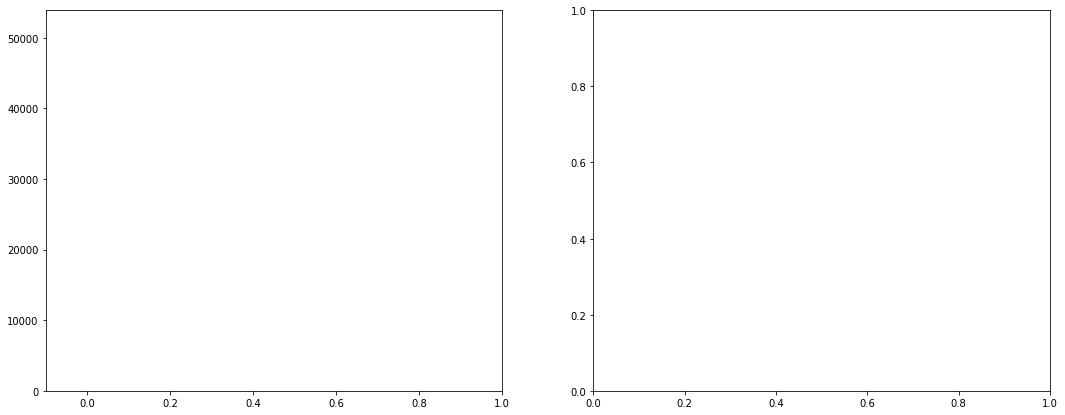

In [13]:
#############################################################################
############## THIS LED TO A MEMORY ERROR ###################################
#############################################################################

from __future__ import print_function

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [ ]:
################################################################################################
############### AFFINITY PROPOGATION LED TO A MEMORY ERROR EVEN WITH THE SAMPLE SIZE OF 30% ####
################################################################################################

### Using AffinityPropogation for clustering

# from sklearn.cluster import AffinityPropagation
# from sklearn import metrics
# 
# # Declare the model and fit it in one statement.
# # Note that you can provide arguments to the model, but we didn't.
# af = AffinityPropagation().fit(X)
# print('Done')
# 
# # Pull the number of clusters and cluster assignments for each data point.
# cluster_centers_indices = af.cluster_centers_indices_
# n_clusters_ = len(cluster_centers_indices)
# labels = af.labels_
# 
# print('Estimated number of clusters: {}'.format(n_clusters_))

### Next, perform some unsupervised feature generation and selection using the techniques covered in this unit and elsewhere in the course. 

In [ ]:
sentences_list=[]
for index, row in sentences.iterrows():
    sen = str(row[0])
    sentences_list.append(sen)

print(sentences_list[0:4])

In [ ]:
# Using tf-idf

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
sentences_tfidf=vectorizer.fit_transform(sentences_list)
print("Number of features: %d" % sentences_tfidf.get_shape()[1])

### Using those features then build models to attempt to classify your texts by author. Try different permutations of unsupervised and supervised techniques to see which combinations have the best performance.

In [ ]:
################################################################################
################ RESERVE 25% OF YOUR CORPUS AS A TEST SET ######################
################################################################################

from sklearn.model_selection import train_test_split

Y = sentences[1]
X = sentences[0]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=0)

In [ ]:
#splitting into training and test sets using the sentences_tfidf data
X_train_tfidf, X_test_tfidf= train_test_split(sentences_tfidf, test_size=0.25, random_state=0)

#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train[5])
print('Tf_idf vector:', tfidf_bypara[5])

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.
svd= TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])

In [ ]:
# from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
#lr.fit(sentences_tfidf, sentences[1])
#lr.predict(sentences[1])
#print(lr.score())

print(cross_val_score(lr, sentences_tfidf, sentences[1]))

### Lastly return to your holdout group. Does your clustering on those members perform as you'd expect? Have your clusters remained stable or changed dramatically? What about your model? Is it's performance consistent?

### If there is a divergence in the relative stability of your model and your clusters, delve into why.

### Your end result should be a write up of how clustering and modeling compare for classifying your texts. What are the advantages of each? Why would you want to use one over the other? Approximately 3-5 pages is a good length for your write up, and remember to include visuals to help tell your story!